# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import variance
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [3]:
# Data Import 
df = pd.read_csv('Wholesale_Data.csv')
df.shape

(440, 8)

In [4]:
# Data Review
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
# Outlier Detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicatessen        27
dtype: int64

In [6]:
# Remove outliers 
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(f'DataFrame after dropping outliers {df.shape}')

DataFrame after dropping outliers (440, 8)


In [7]:
# # Outlier Detection using Z-Score
# z_scores = np.abs((df - df.mean()) / df.std())
# outliers = (z_scores > 3).sum()
# outliers

In [8]:
#Data Description: such as mean, median, and standard deviation
df.describe().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


<Figure size 800x400 with 0 Axes>

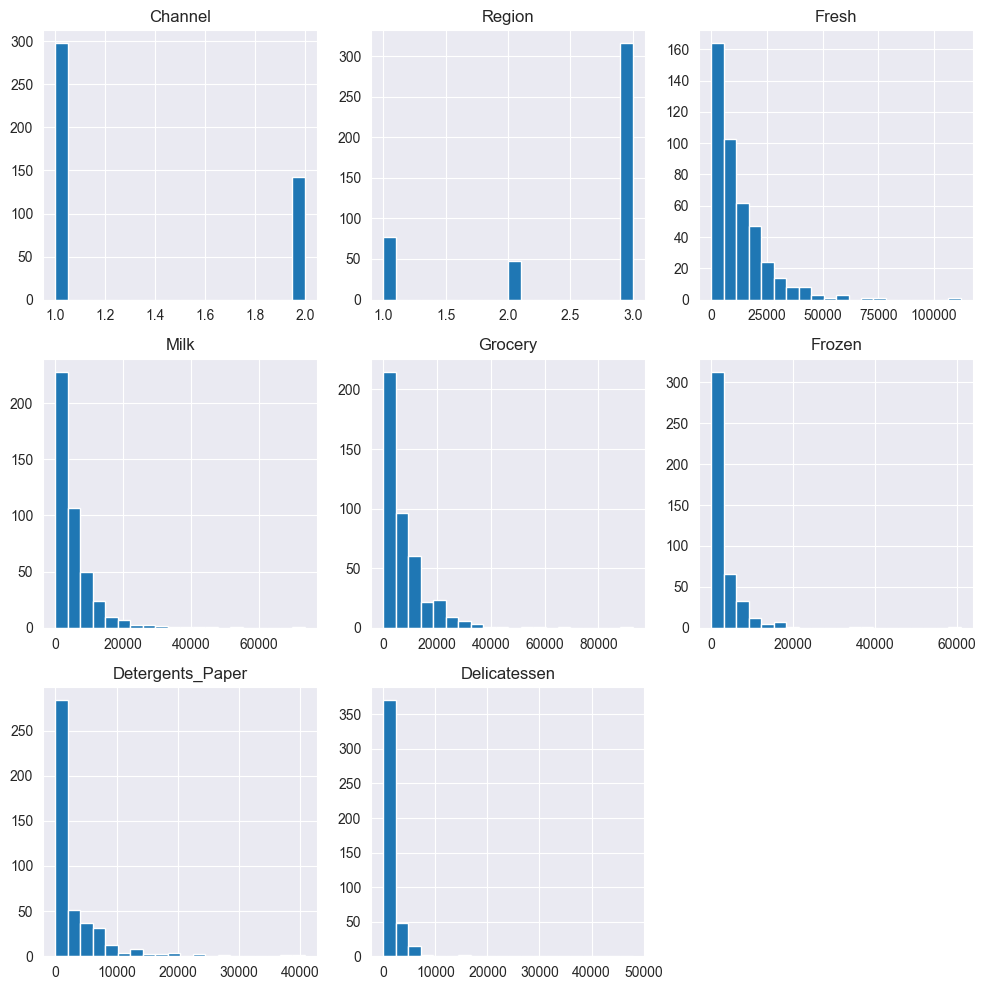

In [9]:
# Data Visualization
plt.figure(figsize=(8, 4))
df.hist(figsize=(10, 10), bins=20, layout=(3, 3))
plt.tight_layout()
plt.show()

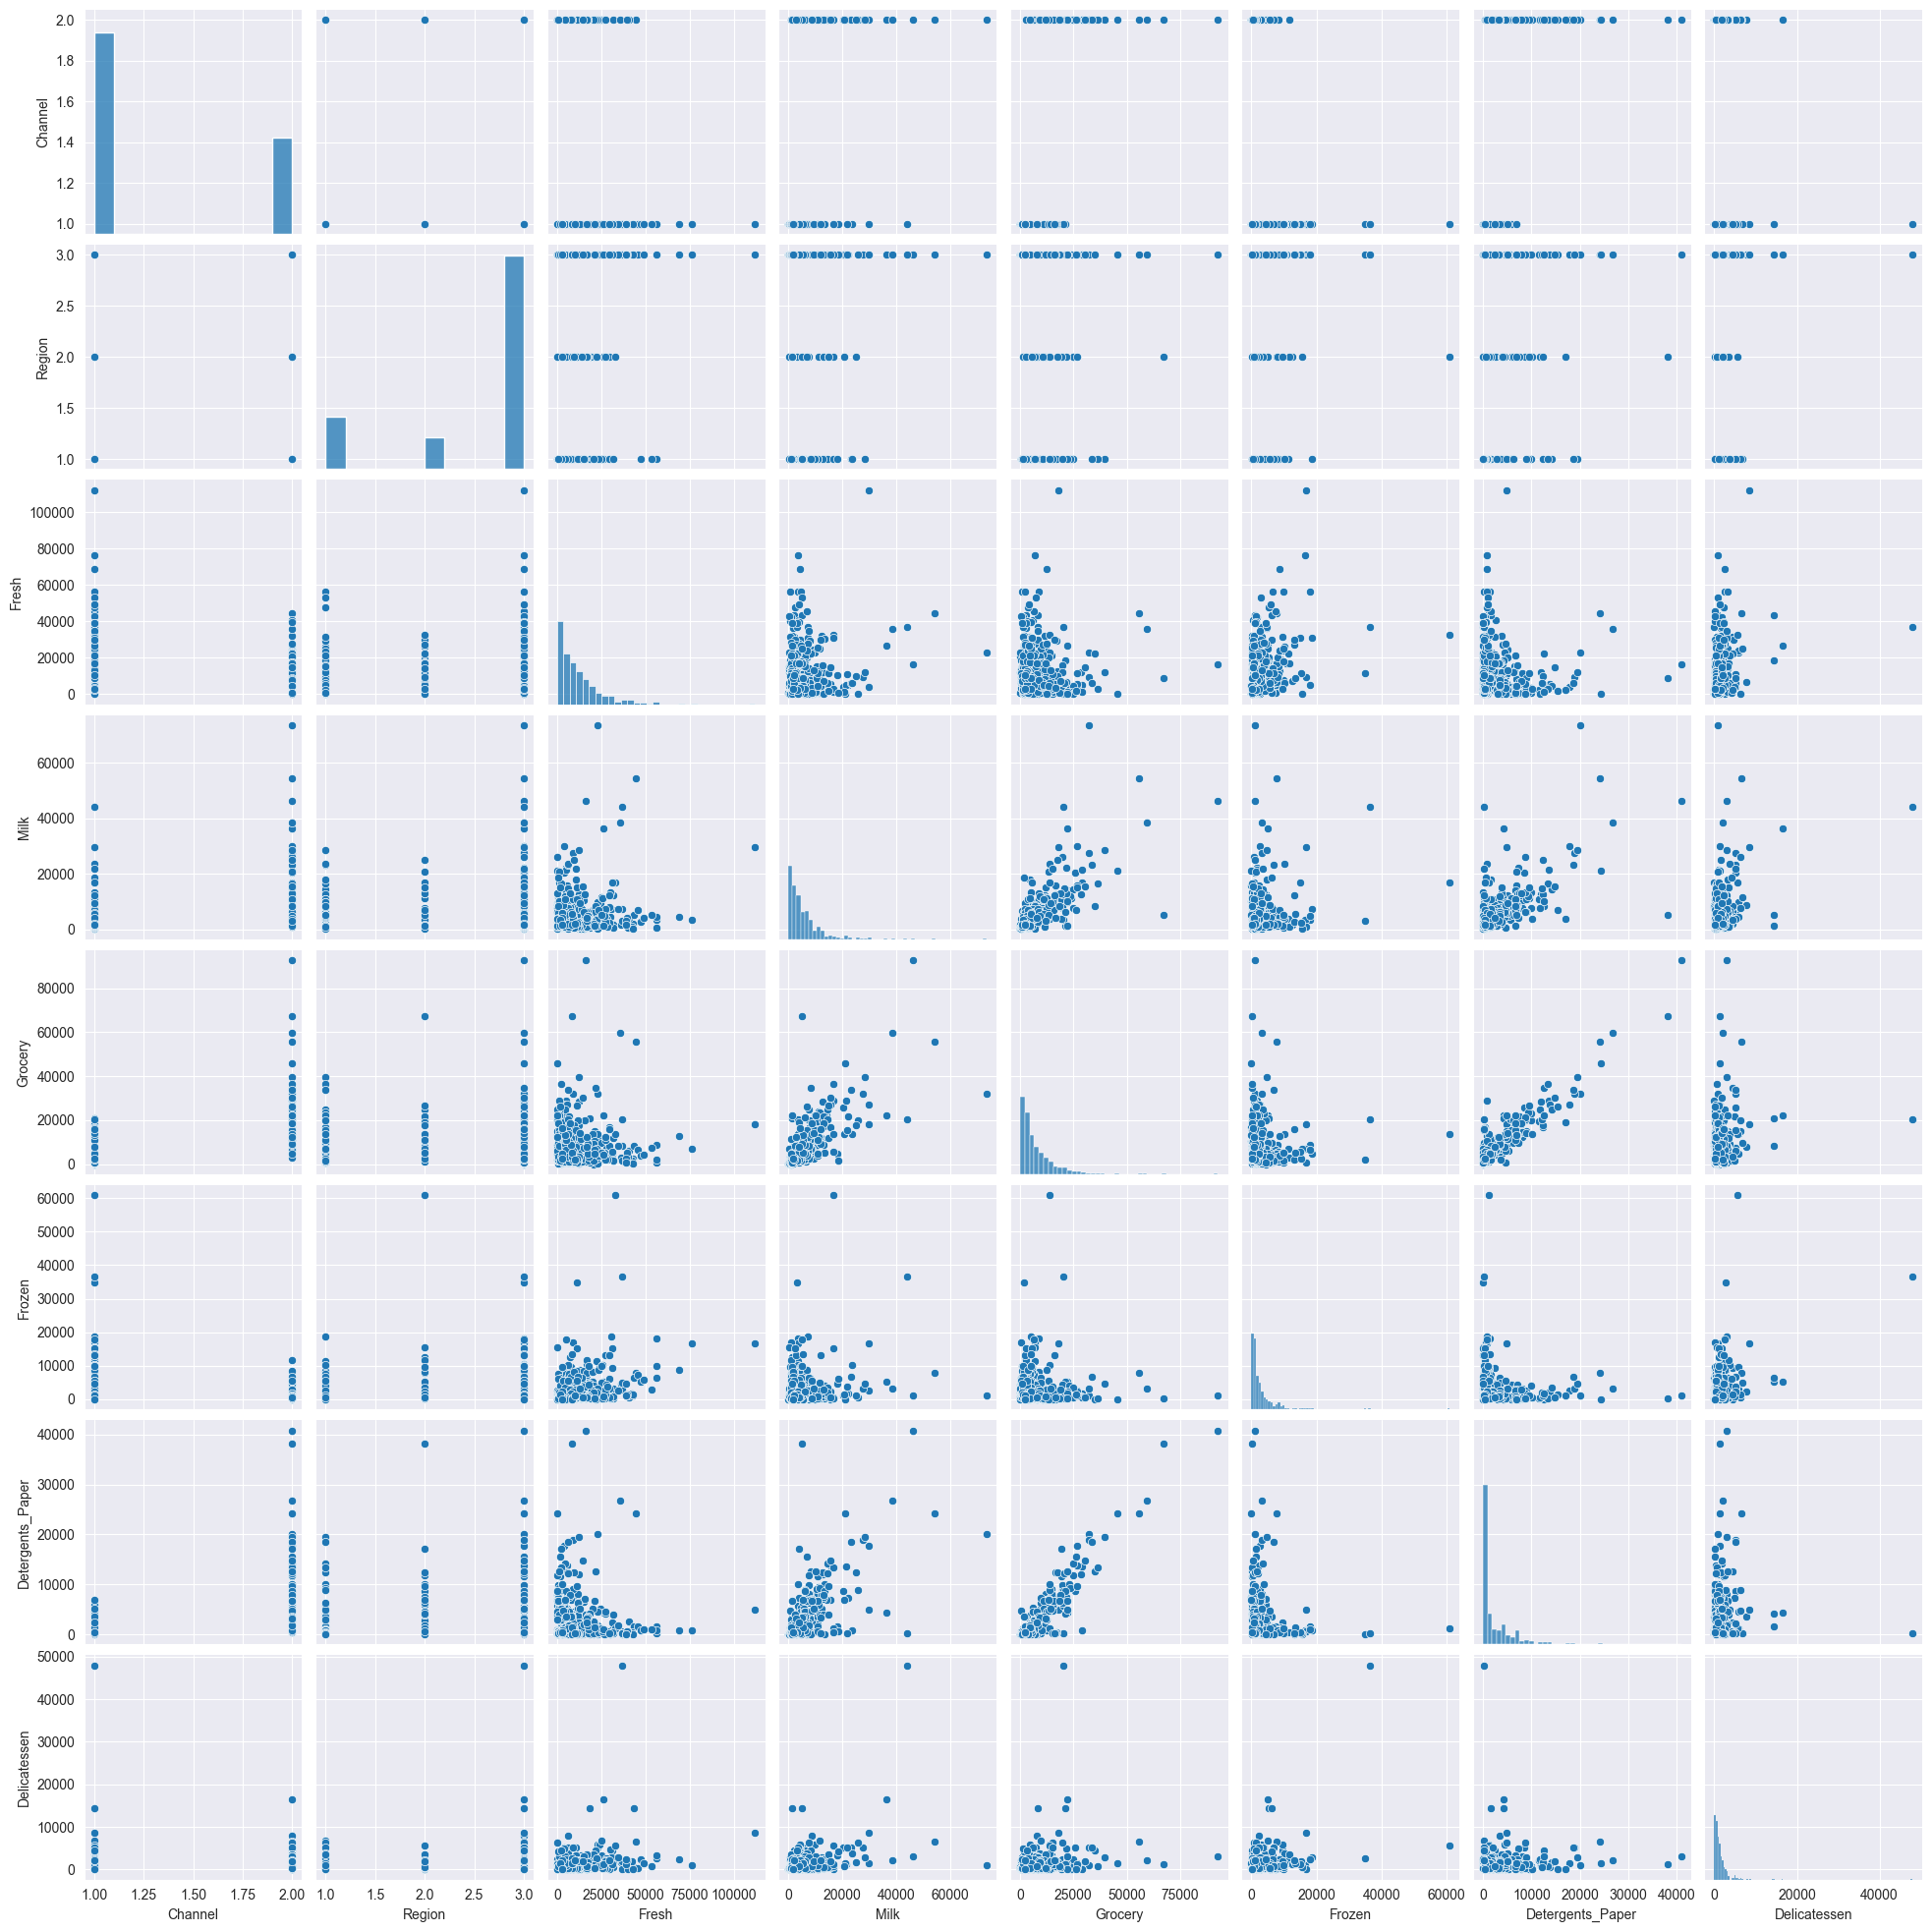

In [10]:
sns.pairplot(df)
plt.show()

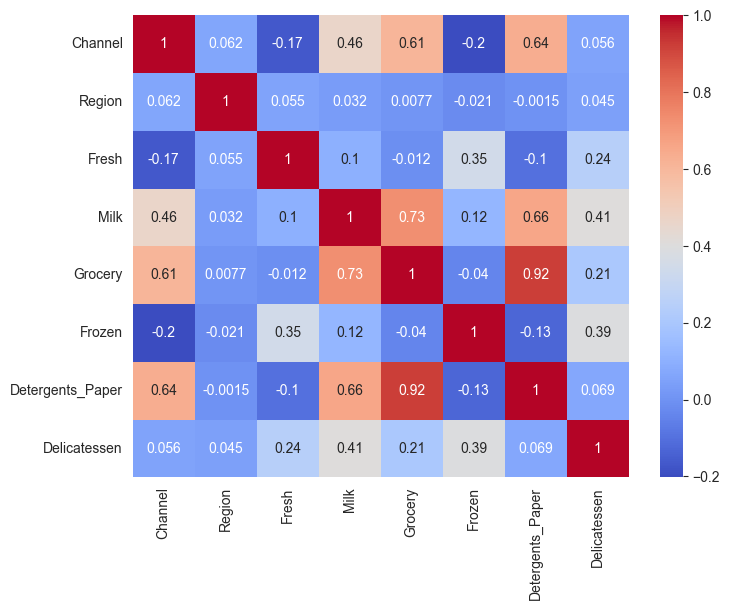

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

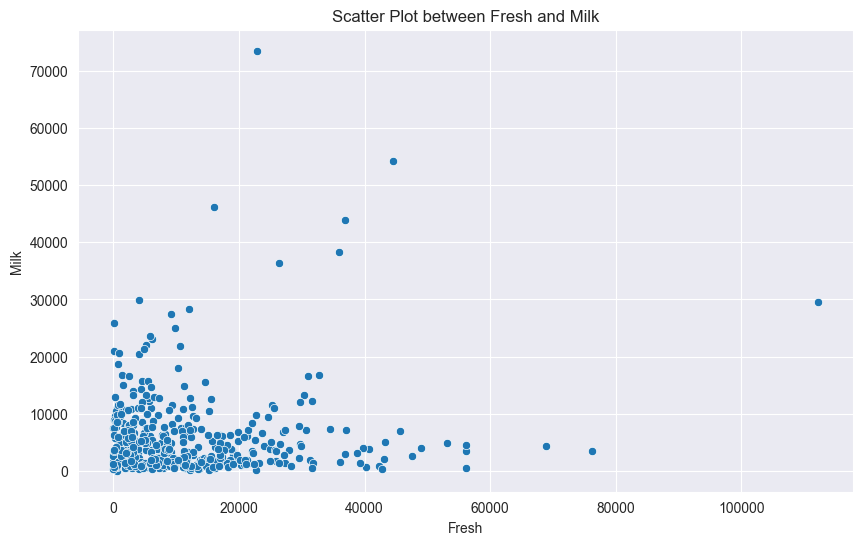

In [12]:
# Scatter Plot (Fresh vs Milk)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fresh', y='Milk')
plt.title('Scatter Plot between Fresh and Milk')
plt.show()

In [13]:
# Correlation Analysis
corr_matrix = df.corr()
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1.0)]
high_corr.round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,NaN,0.73,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,0.73,NaN,NaN,0.92,NaN
Frozen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detergents_Paper,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN
Delicatessen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Data Transformation (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.round(4).head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.4487,0.5907,0.0529,0.5236,-0.0411,-0.5894,-0.0436,-0.0663
1,1.4487,0.5907,-0.3913,0.5445,0.1703,-0.2701,0.0864,0.0892
2,1.4487,0.5907,-0.4470,0.4085,-0.0282,-0.1375,0.1332,2.2433
3,-0.6903,0.5907,0.1001,-0.6240,-0.3930,0.6871,-0.4986,0.0934
4,1.4487,0.5907,0.8402,-0.0524,-0.0794,0.1739,-0.2319,1.2993


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [15]:
# Pre-process the data
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
scaled_features.round(4)[:5]

array([[ 0.0529,  0.5236, -0.0411, -0.5894, -0.0436, -0.0663],
       [-0.3913,  0.5445,  0.1703, -0.2701,  0.0864,  0.0892],
       [-0.447 ,  0.4085, -0.0282, -0.1375,  0.1332,  2.2433],
       [ 0.1001, -0.624 , -0.393 ,  0.6871, -0.4986,  0.0934],
       [ 0.8402, -0.0524, -0.0794,  0.1739, -0.2319,  1.2993]])

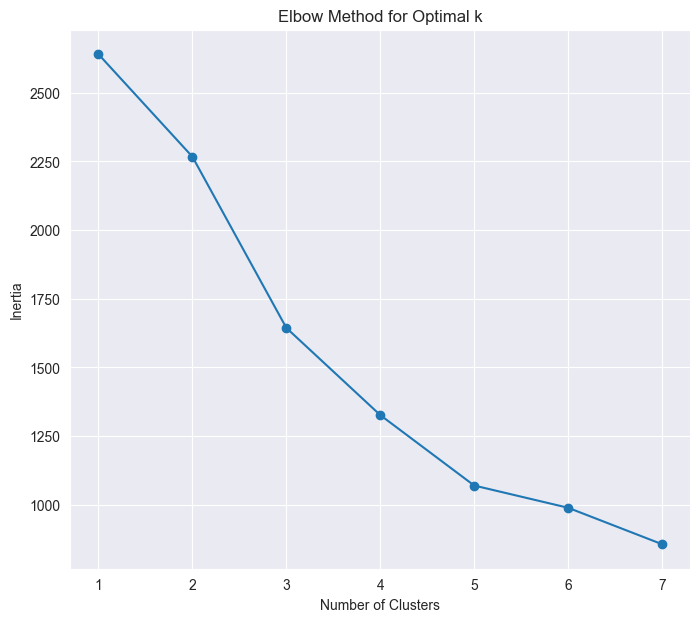

In [16]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 7))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
# Perform k-means clustering with the optimal number of clusters
optimal_k = 3  # Assuming 3 is optimal based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster'].value_counts()

Cluster
0    350
1     53
2     37
Name: count, dtype: int64

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

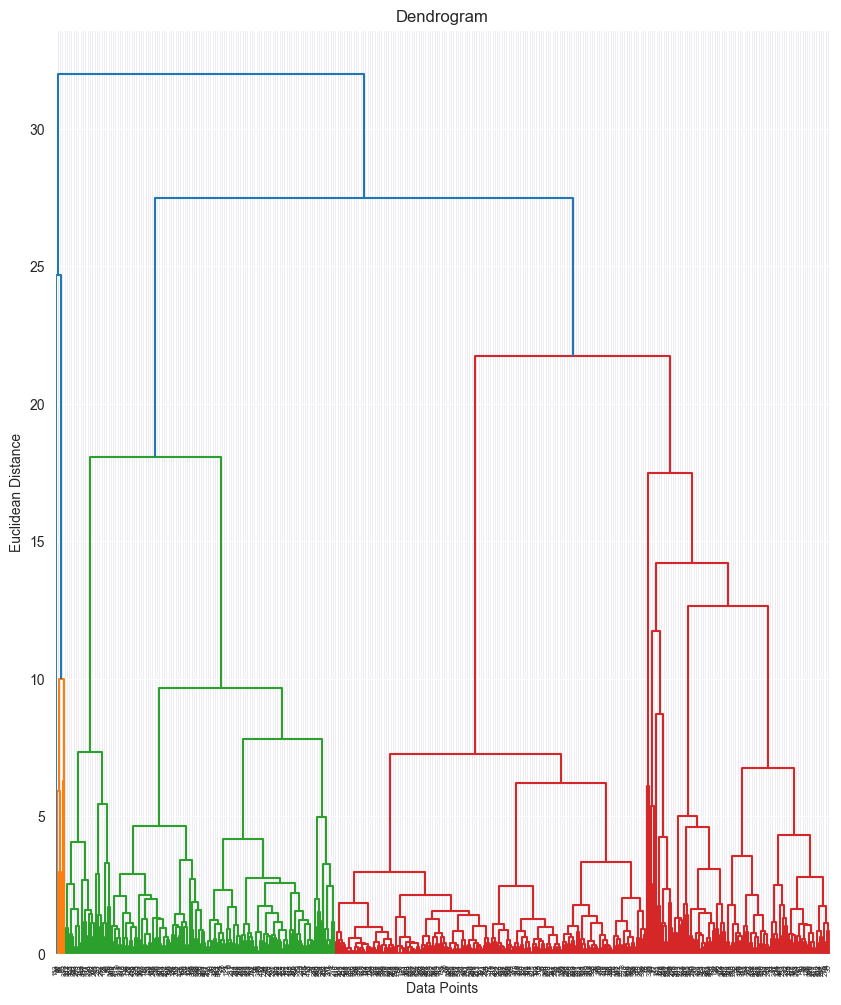

In [18]:
# Construct the dendrogram
plt.figure(figsize=(10, 12))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [19]:
# Perform PCA
pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(scaled_features)
pca_result.round(4)[:5]

array([[ 0.1933, -0.3051,  0.1409],
       [ 0.4344, -0.3284, -0.319 ],
       [ 0.8111,  0.8151, -1.5234],
       [-0.7786,  0.6528, -0.163 ],
       [ 0.1663,  1.2714, -0.0663]])

In [20]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance.round(4).tolist(), '~', explained_variance.round(4).cumsum())

[0.4408, 0.2838, 0.1233] ~ [0.4408 0.7246 0.8479]


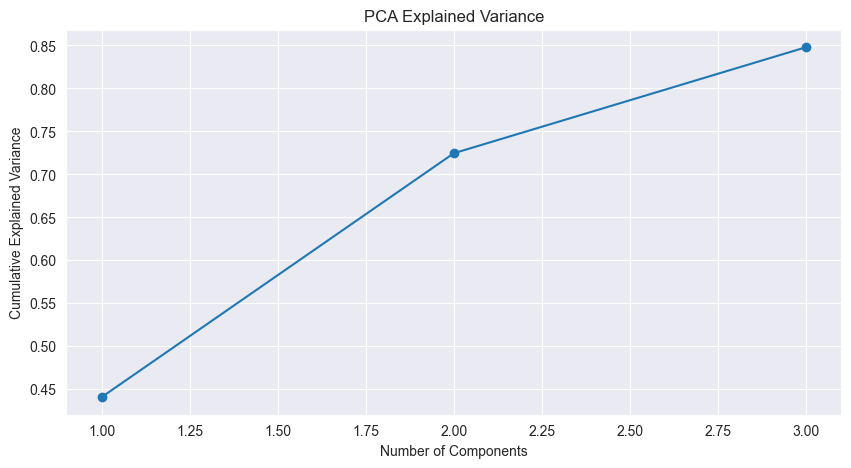

In [21]:
# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [22]:
principal_components_df = pd.DataFrame(
    data=pca_result[:, :3], columns=['PC1', 'PC2','PC3'], index=df.index
)
principal_components_df.head()

,PC1,PC2,PC3
0,0.193291,-0.305100,0.140878
1,0.434420,-0.328413,-0.319007
2,0.811143,0.815096,-1.523416
3,-0.778648,0.652754,-0.163012
4,0.166287,1.271434,-0.066279


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings. These bullet points should be written in a way that is understandable to a non-technical audience.

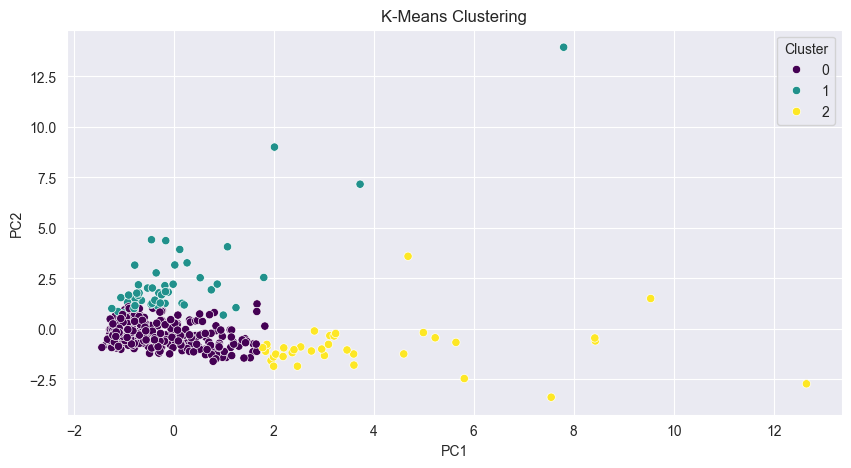

In [23]:
# Clustering Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(data=principal_components_df, x='PC1', y='PC2', hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

#### 1. The PCA analysis revealed that the first two principal components capture approximately 72% of the total variance, suggesting dimensionality reduction is effective.
#### 2. The k-means clustering identified 3 distinct clusters among the wholesale customers based on purchasing patterns.
#### 3. High correlation is observed between 'Grocery' and 'Detergents_Paper', indicating these features are likely closely related in this dataset.
#### 4. Hierarchical clustering and dendrogram analysis provided a detailed hierarchy of customer relationships, supporting cluster insights.

In [24]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.46
